<a href="https://colab.research.google.com/github/DaniilAszn/Math_modeling_2_course/blob/main/MMAP_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Описание задачи.**

Решить интегральное уравнение Фредгольма 2-го рода с вырожденным ядром с помощью методов трапеций, Симпсона, трёх восьмых для числа разбиений $n=10$, $N=100$

$$u(x) - \frac{1}{2} \int \limits_{0}^{1} x e^t u(t) dt = e^{-x}$$

# **Численная схема описанного математического метода.**

## Метод трапеций:



$$I_{трапеции} = \frac{h}{2} \sum^{n}_{i=0} k_i f(x_i); h = \frac{b - a}{n}, x_i = a + ih, i=0,_\cdots,n$$

\begin{equation*}
    k_i = \begin{cases}
        1, i = 0
        \\
        2, i \neq 0, i \neq n-1
        \\
        1, i = n
    \end{cases}
\end{equation*}

$$R_{трапеции} = -\frac{(b - a)^3}{12n^3} f''(\xi), a<\xi<b$$

## Метод Симпсона:



$$I_{Симпсон} = \frac{h}{3} \sum^{n}_{i=0} k_i f(x_i); h = \frac{b - a}{n}, x_i = a + ih, i=0,_\cdots,n$$

\begin{equation*}
    k_i = \begin{cases}
        1, i = 0
        \\
        2, i\ \vdots\ 2
        \\
        4, i \not{\vdots}\ 2
        \\
        1, i = n
    \end{cases}
\end{equation*}

$$R_{Симпсон} = -\frac{(b - a)^5}{2880n^4} f^{(4)}(\xi), a<\xi<b$$

## Метод трёх восьмых:



$$I_{\frac{3}{8}} = \frac{3h}{8} \sum^{n}_{i=0} k_i f(x_i); h = \frac{b - a}{n}, x_i = a + ih, i=0,_\cdots,n$$

\begin{equation*}
    k_i = \begin{cases}
        1, i = 0
        \\
        2, i\ \vdots\ 3
        \\
        3, i \not{\vdots}\ 3
        \\
        1, i = n
    \end{cases}
\end{equation*}

$$R_{\frac{3}{8}} = -\frac{(b - a)^5}{80n^4} f^{(4)}(\xi), a<\xi<b$$

# **Аналитическое решение.**

$$u(x) - \frac{1}{2} \int \limits_{0}^{1} x e^t u(t) dt = e^{-x}$$

$$u(x) - \frac{x}{2} \int \limits_{0}^{1} e^t u(t) dt = e^{-x}$$

$$\int \limits_{0}^{1} e^t u(t) dt = C$$

$$u(x) - \frac{x}{2} C = e^{-x}$$

$$u(x) = C \frac{x}{2} + e^{-x}$$

$$C \frac{x}{2} + e^{-x} - \frac{1}{2} \int \limits_{0}^{1} x e^t [C \frac{t}{2} + e^{-t}] dt = e^{-x}$$

$$C \frac{x}{2} + e^{-x} - \frac{1}{2} \int \limits_{0}^{1} (C \frac{xe^t \cdot t}{2} + xe^t \cdot e^{-t}) dt = e^{-x}$$

$$C \frac{x}{2} + e^{-x} - C \frac{x}{4} \int \limits_{0}^{1} e^t t dt - \frac{x}{2} \int \limits_{0}^{1} dt = e^{-x}$$

$$\int \limits_{0}^{1} e^t t dt \rightarrow [u = t, du=dt; dv=e^tdt, v=e^t] \rightarrow e^tt|_{0}^{1} - \int \limits_{0}^{1} e^t dt = e - (e - 1) = 1$$

$$\int \limits_{0}^{1} dt = 1$$

$$C \frac{x}{2} + e^{-x} - C \frac{x}{4} \cdot 1 - \frac{x}{2} \cdot 1 = e^{-x}$$

$$C (\frac{x}{2} - \frac{x}{4}) = e^{-x} - e^{-x} + \frac{x}{2}$$

$$C = \frac{\frac{x}{2}}{\frac{x}{2} - \frac{x}{4}} = \frac{\frac{1}{2}}{\frac{1}{2} - \frac{1}{4}} = 2$$

$$u(x) = 2 \cdot \frac{x}{2} + e^{-x} = x + e^{-x}$$

# **Программная реализация.**

Что нужно сделать: сравнить аналитическое решение $u_1(x) = x + e^{-x}$ с численным $u_2(x) = \frac{x}{2} \int \limits_{0}^{1} e^t [t + e^{-t}] dt + e^{-x}$, где интеграл $\int \limits_{0}^{1} e^t [t + e^{-t}] dt$ мы считаем с помощью ЧМов

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Иксы
def x(i):
    return a + i * h

# Подынтегральная функция
def f(x):
    return np.exp(x) * (x + np.exp(- x))

# Аналитическое решение
def u_analytical(x):
    return x + np.exp(- x)

# Численное решение
def u_numerical(x, C_Int):
    return (x / 2) * C_Int + np.exp(- x)

# Ошибка
def delta(u_ana, u_num):
    return (np.sum((u_ana - u_num) ** 2)) / (np.sum(u_ana ** 2))

# Графика
def visualization(X, u_ana, u_num, delta, method_name):
    plt.plot(X, U_analitycal, c='green', label='Аналитическое решение')
    plt.plot(X, U_trapezoid, c='red', label=method_name, linestyle='--')
    plt.title(f'Визуализация решений; $\delta$={delta}')
    plt.legend()

In [ ]:
# Коэффициент к
def k_trapezoid(i):
    return 1 * (i == 0 or i == n) + 2 * (i != 0 and i != n)

# Метод трапеций
def Int_trapezoid(n, h):
    S = f(x(0)) + f(x(n))
    for i in range(1, n):
        S += k_trapezoid(i) * f(x(i))
    S = (h / 2) * S

    return S

In [ ]:
# Коэффициент к
def k_Simpson(i):
    return 1 * (i == 0 or i == n) + 2 * (i % 2 == 0 and (i != 0 or i != n)) + 4 * (i % 2 != 0 and (i != 0 or i != n))

# Метод Симпсона
def Int_Simpson(n, h):
    S = f(x(0)) + f(x(n))
    for i in range(1, n):
        S += k_Simpson(i) * f(x(i))
    S = (h / 3) * S

    return S

In [ ]:
# Коэффициент к
def k_three_eighths(i):
    return 1 * (i == 0 or i == n) + 2 * (i % 3 == 0 and (i != 0 or i != n)) + 3 * (i % 3 != 0 and (i != 0 or i != n))

# Метод трёх восьмых
def Int_three_eighths(n, h):
    S = f(x(0)) + f(x(n))
    for i in range(1, n):
        S += k_three_eighths(i) * f(x(i))
    S = (3 / 8) * h * S

    return S

In [ ]:
a, b = 0, 1

# **Оценка погрешности расчётов для каждого метода и каждого шага.**

## n = 10

In [ ]:
n = 10
h = (b - a) / n

In [ ]:
C_trapezoid = Int_trapezoid(n, h)
C_Simpson = Int_Simpson(n, h)
C_three_eighths = Int_three_eighths(n, h)

In [ ]:
X = np.array([x(i) for i in range(n + 1)])

U_analitycal = u_analytical(X)
U_trapezoid = u_numerical(X, C_trapezoid)
U_Simpson = u_numerical(X, C_Simpson)
U_three_eighths = u_numerical(X, C_three_eighths)

### Метод трапеций

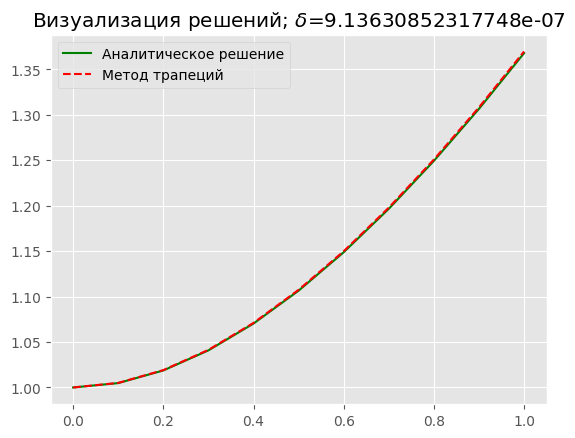

In [ ]:
visualization(X, U_analitycal, U_trapezoid, delta(U_analitycal, U_trapezoid), 'Метод трапеций')

### Метод Симпсона

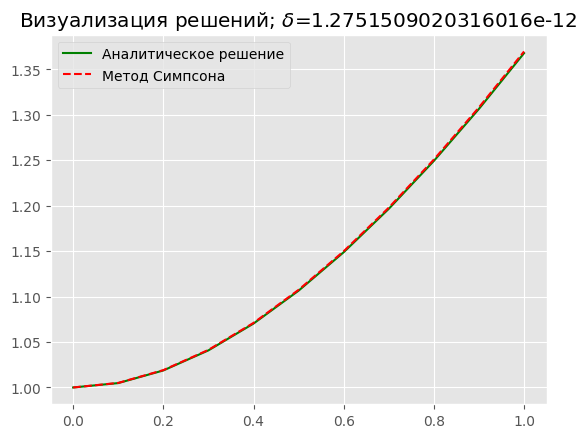

In [ ]:
visualization(X, U_analitycal, U_Simpson, delta(U_analitycal, U_Simpson), 'Метод Симпсона')

### Метод трёх восьмых

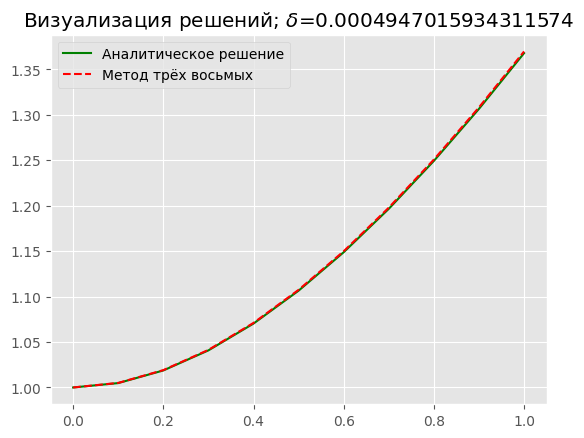

In [ ]:
visualization(X, U_analitycal, U_three_eighths, delta(U_analitycal, U_three_eighths), 'Метод трёх восьмых')

## N = 100

In [ ]:
N = 100
h = (b - a) / N

In [ ]:
C_trapezoid = Int_trapezoid(N, h)
C_Simpson = Int_Simpson(N, h)
C_three_eighths = Int_three_eighths(N, h)

In [ ]:
X = np.array([x(i) for i in range(N + 1)])

U_analitycal = u_analytical(X)
U_trapezoid = u_numerical(X, C_trapezoid)
U_Simpson = u_numerical(X, C_Simpson)
U_three_eighths = u_numerical(X, C_three_eighths)

### Метод трапеций

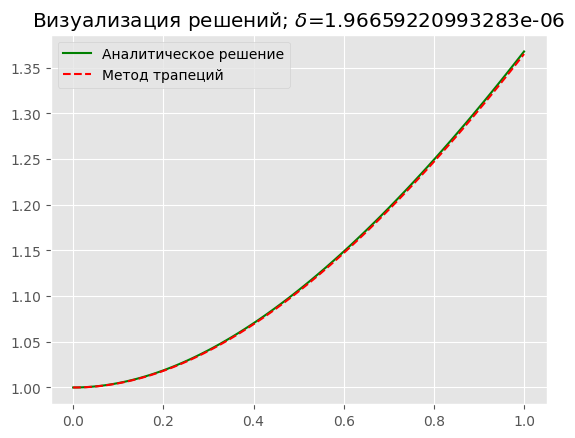

In [ ]:
visualization(X, U_analitycal, U_trapezoid, delta(U_analitycal, U_trapezoid), 'Метод трапеций')

### Метод Симпсона

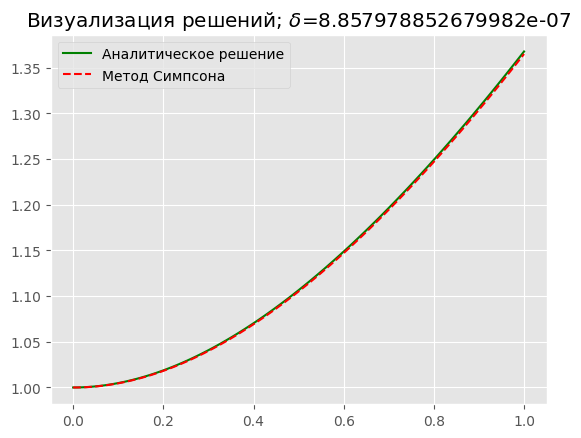

In [ ]:
visualization(X, U_analitycal, U_Simpson, delta(U_analitycal, U_Simpson), 'Метод Симпсона')

### Метод трёх восьмых

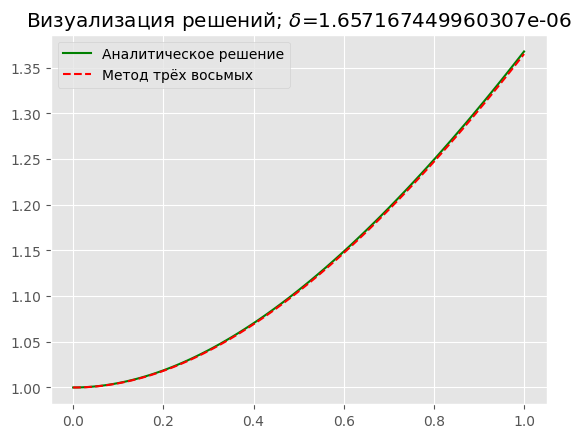

In [ ]:
visualization(X, U_analitycal, U_three_eighths, delta(U_analitycal, U_three_eighths), 'Метод трёх восьмых')

# **Выводы.**

В ходе решения практической работы были решены следующие задачи:
1. Решено интегральное уравнение.
2. Обеспечена программная реализация вычисления определённых интегралов методами трапеций, Симпсона и трёх восьмых для разных чисел разбиения.
3. Проведена оценка погрешности расчётов.

МЫ БОЛЬШИЕ МОЛОДЦЫ!